In [1]:

%run ../../load_magic/storage.py
%run ../../load_magic/dataframes.py
%run ../../load_magic/lists.py
%pprint
gdp_df = load_object('gdp_df')
%who

DATA_FOLDER: ../data/
SAVES_FOLDER: ../saves/
Pretty printing has been turned OFF
DATA_CSV_FOLDER	 DATA_FOLDER	 ENCODING_TYPE	 SAVES_CSV_FOLDER	 SAVES_FOLDER	 SAVES_PICKLE_FOLDER	 SequenceMatcher	 attempt_to_pickle	 check_4_doubles	 
check_for_typos	 csv	 encoding	 example_iterrows	 gdp_df	 get_column_descriptions	 load_csv	 load_dataframes	 load_object	 
math	 os	 pd	 pickle	 save_dataframes	 similar	 store_objects	 sys	 time	 



In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

basecolor_list = list(mcolors.BASE_COLORS.keys())
column_description_dict = load_object('column_description_dict')
def get_column_description(column_name):
    if column_name in column_description_dict:
        column_description = column_description_dict[column_name]
    else:
        column_description = re.sub('^pf_', 'Personal Freedom:_', str(column_name), 1)
        column_description = re.sub('^hf_', 'Human Freedom:_', str(column_description), 1)
        column_description = re.sub('^ef_', 'Economic Freedom:_', str(column_description), 1)
        column_list = column_description.split('_')
        descr_list = []
        for word in column_list:
            descr_list.append(word[0].upper()+word[1:])
        column_description = ' '.join(descr_list)
        column_description_dict[column_name] = column_description
        store_objects(column_description_dict=column_description_dict)
    
    return column_description

In [10]:

max_match_series = (gdp_df['GE_EST'] == gdp_df['GE_EST'].max())
min_match_series = (gdp_df['GE_EST'] == gdp_df['GE_EST'].min())
gdp_df[max_match_series].index

Index(['Singapore'], dtype='object', name='Country')

In [9]:

for key, value in column_description_dict.items():
    if 'Effectiveness' in str(value):
        print()
        print('{}: {}'.format(key, value))
        print(gdp_df[key].value_counts(bins=10))


GE_EST: Government Effectiveness: Estimate
(-0.867, -0.424]    31
(-0.424, 0.0198]    28
(0.0198, 0.463]     17
(-1.31, -0.867]     17
(1.35, 1.793]       11
(0.906, 1.35]       10
(1.793, 2.236]       8
(0.463, 0.906]       7
(-1.754, -1.31]      7
(-2.202, -1.754]     2
Name: GE_EST, dtype: int64

GE_NO_SRC: Government Effectiveness: Number of Sources
(9.0, 10.0]                  37
(6.0, 7.0]                   29
(10.0, 11.0]                 21
(8.0, 9.0]                   20
(7.0, 8.0]                   13
(11.0, 12.0]                 11
(5.0, 6.0]                    5
(12.0, 13.0]                  1
(2.9890000000000003, 4.0]     1
(4.0, 5.0]                    0
Name: GE_NO_SRC, dtype: int64

GE_PER_RNK: Government Effectiveness: Percentile Rank
(60.0, 70.0]      18
(10.0, 20.0]      18
(30.0, 40.0]      16
(90.0, 100.0]     15
(20.0, 30.0]      15
(40.0, 50.0]      14
(80.0, 90.0]      13
(50.0, 60.0]      12
(-0.101, 10.0]    10
(70.0, 80.0]       7
Name: GE_PER_RNK, dtype: int

(-0.867, -0.424]    31
(-0.424, 0.0198]    28
(0.0198, 0.463]     17
(-1.31, -0.867]     17
(1.35, 1.793]       11
(0.906, 1.35]       10
(1.793, 2.236]       8
(0.463, 0.906]       7
(-1.754, -1.31]      7
(-2.202, -1.754]     2
Name: GE_EST, dtype: int64

In [27]:

tables_url = 'https://en.wikipedia.org/wiki/African_diaspora'
tables_df_list = pd.read_html(tables_url)
print([(i, df.shape) for (i, df) in enumerate(tables_df_list) if df.shape[0] >= 50])

[(1, (72, 4))]


In [38]:

def f(x):
    x = str(x).split('%')[0]
    try:
        x = float(x)
    except:
        x = 0.0
    
    return x

In [39]:

descendants_df = tables_df_list[1].copy()
descendants_df.columns = ['Country', 'Population', 'Afro-descendants', 'African and African-mixed population']
descendants_df['Country'] = descendants_df['Country'].map(lambda x: x.split('[')[0])
descendants_df.set_index('Country', inplace=True)
descendants_df['Population'] = descendants_df['Population'].map(lambda x: int(x))
descendants_df['Afro-descendants'] = descendants_df['Afro-descendants'].map(f)

In [40]:

descendants_df.sort_values('Afro-descendants', ascending=False)

,Population,Afro-descendants,African and African-mixed population
Country,,,
Saint Kitts and Nevis,39619,98.0,38827
Dominica,71293,96.0,"61,882 + 9,411"
Haiti,10646714,95.0,"10,114,378 + 532,335"
Antigua and Barbuda,78000,95.0,63000
Jamaica,2812090,92.1,"2,663,614 + 176,417"
Grenada,110000,91.0,101309
The Bahamas,332634,90.6,301366
Turks and Caicos islands,26000,90.0,18000
Barbados,281968,90.0,253771


In [41]:

columns_list = ['Afro-descendants', 'Murder_rate']
merge_df = pd.merge(left=gdp_df, right=descendants_df, left_index=True, right_index=True, suffixes=('_gdp', '_decendants'))[columns_list]

In [42]:

def show_linear_scatterplot(merged_df, columns_list, ev_min_str=None, ev_max_str=None, rv_min_str=None, rv_max_str=None):
    ev_column_name = columns_list[0]
    rv_column_name = columns_list[1]
    explanatory_variable = get_column_description(ev_column_name)
    response_variable = get_column_description(rv_column_name)
    if (ev_min_str is None):
        ev_min_str = 'minimum {}'.format(explanatory_variable)
    if (ev_max_str is None):
        ev_max_str = 'maximum {}'.format(explanatory_variable)
    if (rv_min_str is None):
        rv_min_str = 'minimum {}'.format(response_variable)
    if (rv_max_str is None):
        rv_max_str = 'maximum {}'.format(response_variable)
    
    df = merged_df.copy()
    columns_list = [ev_column_name, rv_column_name]
    df = df[columns_list].dropna()
    ev_max = df[ev_column_name].max()
    ev_min = df[ev_column_name].min()
    rv_min = df[rv_column_name].min()
    rv_max = df[rv_column_name].max()
    ev_max_labeled = False
    ev_min_labeled = False
    rv_min_labeled = False
    rv_max_labeled = False
    
    # First order (linear) scatterplot
    fig1_fig = plt.figure(figsize=(12,8))
    merge_axes_subplot = sns.regplot(x=ev_column_name, y=rv_column_name,
                                     scatter=True, data=df)
    xlabel_text = plt.xlabel('{} (explanatory variable)'.format(explanatory_variable))
    ylabel_text = plt.ylabel('{} (response variable)'.format(response_variable))
    
    # Add annotations
    for label, x, y in zip(df.index, df[ev_column_name], df[rv_column_name]):
        if (x == ev_min):
            if not ev_min_labeled:
                ev_min_labeled = True
                annotation = plt.annotate('{} ({})'.format(label, ev_min_str), xy=(x, y), xytext=ev_min_xytext, **kwargs)
        elif (x == ev_max):
            if not ev_max_labeled:
                ev_max_labeled = True
                annotation = plt.annotate('{} ({})'.format(label, ev_max_str), xy=(x, y), xytext=ev_max_xytext, **kwargs)
        elif (y == rv_min):
            if not rv_min_labeled:
                rv_min_labeled = True
                annotation = plt.annotate('{} ({})'.format(label, rv_min_str), xy=(x, y), xytext=rv_min_xytext, **kwargs)
        elif (y == rv_max):
            if not rv_max_labeled:
                rv_max_labeled = True
                annotation = plt.annotate('{} ({})'.format(label, rv_max_str), xy=(x, y), xytext=rv_max_xytext, **kwargs)
        elif (label == 'United States'):
            annotation = plt.annotate('{} (most evil)'.format(label), xy=(x, y), xytext=us_xytext, **kwargs)
    
    # Add r-squared
    x = df[ev_column_name].values
    y = df[rv_column_name].values
    plt.text(0.92, 0.965, r'$r^2 = {0:.2}$'.format(stats.pearsonr(x, y)[0] ** 2), fontsize=20, alpha=0.25,
             horizontalalignment='center', verticalalignment='center', transform=merge_axes_subplot.transAxes)

In [44]:

kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

Pickling to C:\Users\dev\Documents\repositories\notebooks\StatsByCountry\saves\pickle\column_description_dict.pickle


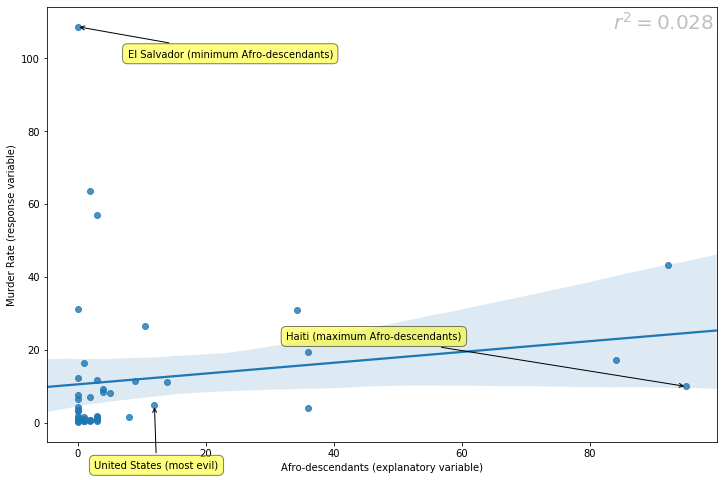

In [45]:

import re
from scipy import stats

rv_min_xytext = (-60, 25)
rv_max_xytext = (-390, 0)
ev_min_xytext = (50, -32)
ev_max_xytext = (-400, 45)
us_xytext = (-60, -65)
show_linear_scatterplot(merge_df, columns_list, ev_min_str=None, ev_max_str=None, rv_min_str=None, rv_max_str=None)

In [6]:

tables_url = 'https://en.wikipedia.org/wiki/List_of_countries_by_tax_rates'
tables_df_list = pd.read_html(tables_url)
print([(i, df.shape) for (i, df) in enumerate(tables_df_list) if df.shape[0] > 50])

[(9, (221, 6))]


In [19]:

def f(x):
    x = re.sub(r'([.\d]+).+', r'\g<1>', str(x), 1)
    if x[0].lower() == 'n':
        x = pd.np.nan
    
    return x

taxes_df = tables_df_list[9].copy()
taxes_df['Country'] = taxes_df['Country'].map(lambda x: x.split('[')[0])
taxes_df.set_index('Country', inplace=True)
taxes_df.columns = ['Corporate', 'Income_lowest', 'Income_highest', 'VAT', 'Further_reading']
for column_name in ['Corporate', 'Income_lowest', 'Income_highest', 'VAT']:
    taxes_df[column_name] = taxes_df[column_name].map(f)
    taxes_df[column_name] = pd.to_numeric(taxes_df[column_name])
taxes_df.sample(5)

,Corporate,Income_lowest,Income_highest,VAT,Further_reading
Country,,,,,
Solomon Islands,NaN,NaN,NaN,NaN,Taxation in Solomon Islands
Colombia,33.0,0.0,35.0,19.0,Taxation in Colombia
South Korea,24.2,6.0,42.0,10.0,Taxation in South Korea
Saint Pierre and Miquelon,NaN,NaN,NaN,NaN,Taxation in Saint Pierre and Miquelon
Cyprus,12.5,0.0,35.0,19.0,Taxation in Cyprus


In [61]:

# https://www.cato.org/human-freedom-index-new
csv_path = os.path.join(DATA_CSV_FOLDER, 'human-freedom-index-data-update.csv')
freedom_df = pd.read_csv(csv_path, encoding=ENCODING_TYPE, low_memory=False)
print(freedom_df.shape)
freedom_df.drop('Unnamed: 0', axis=1, inplace=True)
freedom_df.columns = ['Year', 'ISO_code', 'Country', 'Region', 'hf_score', 'hf_rank', 'hf_quartile', 'pf_rol_procedural',
                      'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide', 'pf_ss_disappearances_disap',
                      'pf_ss_disappearances_violent', 'pf_ss_disappearances_organized', 'pf_ss_disappearances_fatalities',
                      'pf_ss_disappearances_injuries', 'pf_ss_disappearances', 'pf_ss_women_fgm', 'pf_ss_women_missing',
                      'pf_ss_women_inheritance_widows', 'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', 'pf_ss_women',
                      'pf_ss', 'pf_movement_domestic', 'pf_movement_foreign', 'pf_movement_women', 'pf_movement',
                      'pf_religion_estop_establish', 'pf_religion_estop_operate', 'pf_religion_estop',
                      'pf_religion_harassment', 'pf_religion_restrictions', 'pf_religion', 'pf_association_association',
                      'pf_association_assembly', 'pf_association_political_establish',
                      'pf_association_political_operate', 'pf_association_political', 'pf_association_prof_establish',
                      'pf_association_prof_operate', 'pf_association_prof', 'pf_association_sport_establish',
                      'pf_association_sport_operate', 'pf_association_sport', 'pf_association', 'pf_expression_killed',
                      'pf_expression_jailed', 'pf_expression_influence', 'pf_expression_control', 'pf_expression_cable',
                      'pf_expression_newspapers', 'pf_expression_internet', 'pf_expression', 'pf_identity_legal',
                      'pf_identity_parental_marriage', 'pf_identity_parental_divorce', 'pf_identity_parental',
                      'pf_identity_sex_male', 'pf_identity_sex_female', 'pf_identity_sex', 'pf_identity_divorce', 'pf_identity',
                      'pf_score', 'pf_rank', 'ef_government_consumption', 'ef_government_transfers',
                      'ef_government_enterprises', 'ef_government_tax_income', 'ef_government_tax_payroll', 'ef_government_tax',
                      'ef_government', 'ef_legal_judicial', 'ef_legal_courts', 'ef_legal_protection', 'ef_legal_military',
                      'ef_legal_integrity', 'ef_legal_enforcement', 'ef_legal_restrictions', 'ef_legal_police', 'ef_legal_crime',
                      'ef_legal_gender', 'ef_legal', 'ef_money_growth', 'ef_money_sd', 'ef_money_inflation', 'ef_money_currency',
                      'ef_money', 'ef_trade_tariffs_revenue', 'ef_trade_tariffs_mean', 'ef_trade_tariffs_sd',
                      'ef_trade_tariffs', 'ef_trade_regulatory_nontariff', 'ef_trade_regulatory_compliance', 'ef_trade_regulatory',
                      'ef_trade_black', 'ef_trade_movement_foreign', 'ef_trade_movement_capital', 'ef_trade_movement_visit',
                      'ef_trade_movement', 'ef_trade', 'ef_regulation_credit_ownership',
                      'ef_regulation_credit_private', 'ef_regulation_credit_interest', 'ef_regulation_credit',
                      'ef_regulation_labor_minwage', 'ef_regulation_labor_firing', 'ef_regulation_labor_bargain',
                      'ef_regulation_labor_hours', 'ef_regulation_labor_dismissal', 'ef_regulation_labor_conscription',
                      'ef_regulation_labor', 'ef_regulation_business_adm', 'ef_regulation_business_bureaucracy',
                      'ef_regulation_business_start', 'ef_regulation_business_bribes',
                      'ef_regulation_business_licensing', 'ef_regulation_business_compliance', 'ef_regulation_business', 'ef_regulation',
                      'ef_score', 'ef_rank']
match_series = (freedom_df['Country'] == 'Pap. New Guinea')
freedom_df.loc[match_series, 'Country'] = 'Papua New Guinea'
match_series = (freedom_df['Country'] == 'Dominican Rep.')
freedom_df.loc[match_series, 'Country'] = 'Dominican Republic'
match_series = (freedom_df['Country'] == 'Czech Rep.')
freedom_df.loc[match_series, 'Country'] = 'Czech Republic'
match_series = (freedom_df['Country'] == 'Central Afr. Rep.')
freedom_df.loc[match_series, 'Country'] = 'Central African Republic'
match_series = (freedom_df['Country'] == 'Gambia, The')
freedom_df.loc[match_series, 'Country'] = 'Gambia'
match_series = (freedom_df['Country'] == 'Kyrgyz Republic')
freedom_df.loc[match_series, 'Country'] = 'Kyrgyzstan'
match_series = (freedom_df['Country'] == 'Slovak Rep.')
freedom_df.loc[match_series, 'Country'] = 'Slovakia'
match_series = (freedom_df['Country'] == 'Yemen, Rep.')
freedom_df.loc[match_series, 'Country'] = 'Yemen'
match_series = (freedom_df['Country'] == 'Macedonia')
freedom_df.loc[match_series, 'Country'] = 'North Macedonia'
match_series = (freedom_df['Country'] == 'Brunei Darussalam')
freedom_df.loc[match_series, 'Country'] = 'Brunei'
match_series = (freedom_df['Country'] == "Cote d'Ivoire")
freedom_df.loc[match_series, 'Country'] = 'Ivory Coast'
match_series = (freedom_df['Country'] == 'Timor-Leste')
freedom_df.loc[match_series, 'Country'] = 'East Timor'
match_series = (freedom_df['Country'] == 'Korea, South')
freedom_df.loc[match_series, 'Country'] = 'South Korea'
freedom_df.set_index('Country', inplace=True)
print(len(freedom_df.index.unique()))
freedom_df.sample(5).T.sample(7).T

(1458, 124)
162


,ef_regulation_labor_minwage,ef_regulation_business,ef_trade,pf_identity_divorce,ef_regulation_business_bribes,pf_identity_sex_male,pf_religion_restrictions
Country,,,,,,,
Algeria,5.56667,5.15615,4.66299,0,3.32065,0,4.16389
Lebanon,5.56667,4.82131,7.16322,0,1.92926,0,7.72778
Guyana,10,6.17639,7.00999,NaN,3.538,0,9.81667
Fiji,7.76667,7.81763,6.6462,10,NaN,10,8.61111
Tanzania,0,5.02178,6.0769,NaN,3.91629,0,5.65


In [62]:

match_series = (freedom_df.index == 'Algeria')
freedom_df[match_series].T.sample(7).T

,ef_legal,pf_expression_cable,pf_association,ef_regulation_credit_private,pf_ss_women_fgm,ef_government,ef_legal_enforcement
Country,,,,,,,
Algeria,4.69074,10,5,5.30153,10,3.61678,4.50754
Algeria,4.55182,10,5,5.571,10,3.48222,4.50754
Algeria,4.34614,10,5,8.459,10,3.46164,4.508
Algeria,4.34149,10,3.75,10,10,3.40281,4.38602
Algeria,3.91792,10,3.75,9.94175,10,3.17487,4.38602
Algeria,3.48186,10,3.75,9.94175,10,3.71164,4.38602
Algeria,3.83911,10,4.41667,10,10,3.37715,4.38602
Algeria,4.16589,10,4.41667,4.17102,10,3.54015,4.38602
Algeria,4.06031,10,4.41667,4.27665,10,3.49474,4.38602


In [33]:

set(taxes_df.index.unique().tolist()) - set(freedom_df.index.unique().tolist())

{'Eswatini (Swaziland)', 'Bermuda', 'British Virgin Islands', 'Cuba', 'Norfolk Island', 'San Marino', 'Montserrat', 'Saint Vincent and the Grenadines', 'Puerto Rico', 'New Caledonia', 'Palestine', 'Samoa', 'Maldives', 'Grenada', 'Eritrea', 'Isle of Man', 'Turks and Caicos Islands', 'Tuvalu', 'Andorra', 'Nauru', 'Comoros', 'Marshall Islands', 'Djibouti', 'Niue', 'Kiribati', 'Tonga', 'American Samoa', 'Guernsey', 'Cayman Islands', 'Congo', 'Turkmenistan', 'Vanuatu', 'Somalia', 'Cook Islands', 'Sint Maarten', 'Democratic Republic of the Congo', 'Saint Pierre and Miquelon', 'Equatorial Guinea', 'Monaco', 'Falkland Islands', 'Aruba', 'North Korea', 'Pitcairn Islands', 'Saint Lucia', 'Afghanistan', 'Gibraltar', 'Federated States of Micronesia', 'Sark', 'Uzbekistan', 'Saint Kitts and Nevis', 'Tokelau', 'Jersey', 'South Sudan', 'Anguilla', 'Palau', 'São Tomé and Príncipe', 'U.S. Virgin Islands', 'Dominica', 'Liechtenstein', 'Solomon Islands', 'Macau', 'Curaçao'}

In [34]:

set(freedom_df.index.unique().tolist()) - set(taxes_df.index.unique().tolist())

{'Congo, Rep. Of', 'Swaziland', 'Congo, Dem. R.'}

In [35]:

typos_df = check_for_typos(left_list=freedom_df.index.unique().tolist(), right_list=taxes_df.index.unique().tolist())
match_series = (typos_df['max_similarity'] < 1.0)
typos_df[match_series].sort_values('max_similarity', ascending=False).head(10)

3.293182373046875 Thu Oct 10 08:41:27 2019


,left_item,right_item,max_similarity
138,Swaziland,Thailand,0.705882
34,"Congo, Dem. R.",Congo,0.526316
35,"Congo, Rep. Of",Congo,0.526316


In [63]:

match_series = (freedom_df['Year'] == 2016)
freedom_df[match_series].shape

(162, 122)

In [64]:

print(freedom_df[match_series].shape, taxes_df.shape)
merge_df = pd.merge(left=freedom_df[match_series], right=taxes_df, left_index=True, right_index=True, suffixes=('_freedom', '_taxes'))
print(merge_df.shape)
merge_df.columns.tolist()

(162, 122) (221, 5)
(159, 127)


['Year', 'ISO_code', 'Region', 'hf_score', 'hf_rank', 'hf_quartile', 'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide', 'pf_ss_disappearances_disap', 'pf_ss_disappearances_violent', 'pf_ss_disappearances_organized', 'pf_ss_disappearances_fatalities', 'pf_ss_disappearances_injuries', 'pf_ss_disappearances', 'pf_ss_women_fgm', 'pf_ss_women_missing', 'pf_ss_women_inheritance_widows', 'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', 'pf_ss_women', 'pf_ss', 'pf_movement_domestic', 'pf_movement_foreign', 'pf_movement_women', 'pf_movement', 'pf_religion_estop_establish', 'pf_religion_estop_operate', 'pf_religion_estop', 'pf_religion_harassment', 'pf_religion_restrictions', 'pf_religion', 'pf_association_association', 'pf_association_assembly', 'pf_association_political_establish', 'pf_association_political_operate', 'pf_association_political', 'pf_association_prof_establish', 'pf_association_prof_operate', 'pf_association_prof', 'pf_association_

In [65]:

column_descriptions_df = get_column_descriptions(merge_df)
match_series = (column_descriptions_df['dtype'] == 'float64')
numeric_columns_list = column_descriptions_df[match_series]['column_name'].tolist()

In [66]:

for column_name in numeric_columns_list:
    merge_df[column_name] = pd.to_numeric(merge_df[column_name])

In [67]:

r_columns_list = []
for x_column in numeric_columns_list:
    for y_column in numeric_columns_list:
        if x_column != y_column:
            columns_list = [x_column, y_column]
            df = merge_df[columns_list].dropna()
            x = df[x_column].values
            y = df[y_column].values
            try:
                r_tuple = stats.pearsonr(x, y)
                if r_tuple[1] < 0.05:
                    c_tuple = ('/'.join(columns_list), abs(r_tuple[0]))
                    r_columns_list.append(c_tuple)
            except Exception as e:
                print('{} and {} get an error: {}'.format(x_column, y_column, e))
            break

C:\Users\dev\Anaconda3\lib\site-packages\scipy\stats\stats.py:3033: RuntimeWarning: Mean of empty slice.
  mx = x.mean()
C:\Users\dev\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\dev\Anaconda3\lib\site-packages\scipy\stats\stats.py:3034: RuntimeWarning: Mean of empty slice.
  my = y.mean()
C:\Users\dev\Anaconda3\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [68]:

column_pairs_list = sorted(r_columns_list, key=lambda x: x[1], reverse=True)
[column_pairs_list[0][0].split('/')[0], column_pairs_list[0][0].split('/')[1]]

['hf_score', 'hf_rank']

In [83]:

column_description_dict['Corporate'] = 'Corporate Tax Rate: %'
column_description_dict['Income_lowest'] = 'Income Tax Rate (lowest): %'
column_description_dict['Income_highest'] = 'Income Tax Rate (highest): %'
column_description_dict['VAT'] = 'VAT Tax Rate: %'
store_objects(column_description_dict=column_description_dict)

Pickling to C:\Users\dev\Documents\repositories\notebooks\StatsByCountry\saves\pickle\column_description_dict.pickle


In [77]:

column_pairs_list

[('hf_score/hf_rank', 0.9776229366336809), ('hf_rank/hf_score', 0.9776229366336809), ('pf_score/hf_score', 0.9485714717599782), ('hf_quartile/hf_score', 0.9301616171133233), ('pf_rank/hf_score', 0.9287718580294497), ('pf_rol_procedural/hf_score', 0.8678988282126768), ('ef_rank/hf_score', 0.8504181816943804), ('ef_score/hf_score', 0.8426614081053805), ('pf_rol/hf_score', 0.8366727972812049), ('ef_trade/hf_score', 0.8213457815403514), ('ef_trade_regulatory/hf_score', 0.7951023851519766), ('ef_legal/hf_score', 0.7944573888258429), ('pf_expression_control/hf_score', 0.7927720131229491), ('ef_regulation_business_bureaucracy/hf_score', 0.7870276281286175), ('pf_expression/hf_score', 0.7732437419124358), ('pf_expression_influence/hf_score', 0.7622781158251193), ('pf_rol_civil/hf_score', 0.7585046655603706), ('pf_rol_criminal/hf_score', 0.7566913202630547), ('ef_trade_regulatory_compliance/hf_score', 0.7562993739653032), ('pf_ss/hf_score', 0.7540136877502069), ('pf_ss_disappearances_organized/

Pickling to C:\Users\dev\Documents\repositories\notebooks\StatsByCountry\saves\pickle\column_description_dict.pickle


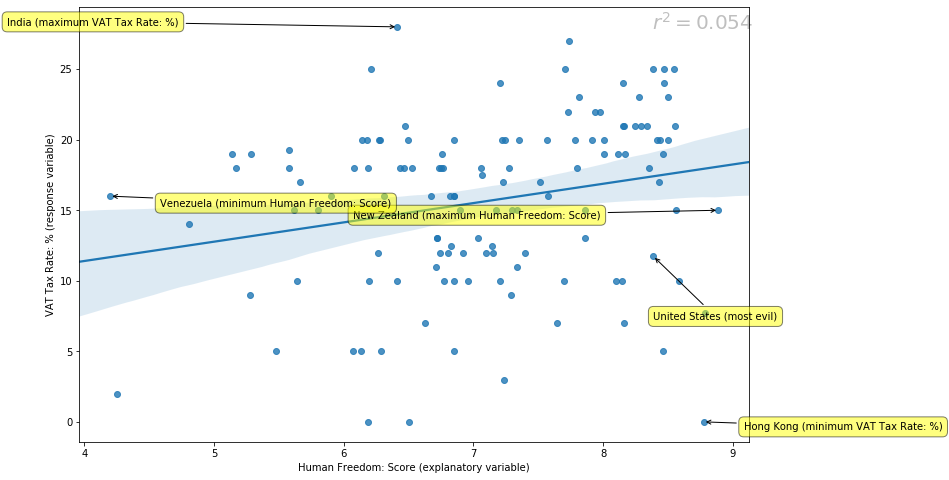

In [87]:

rv_min_xytext = (40, -10)
rv_max_xytext = (-390, 0)
ev_min_xytext = (50, -12)
ev_max_xytext = (-365, -10)
us_xytext = (0, -65)
i = 2
columns_list = [column_pairs_list[i][0].split('/')[0], column_pairs_list[i][0].split('/')[1]]
columns_list = ['hf_score', 'VAT']
show_linear_scatterplot(merge_df, columns_list, ev_min_str=None, ev_max_str=None, rv_min_str=None, rv_max_str=None)

Pickling to C:\Users\dev\Documents\repositories\notebooks\StatsByCountry\saves\pickle\column_description_dict.pickle
Pickling to C:\Users\dev\Documents\repositories\notebooks\StatsByCountry\saves\pickle\column_description_dict.pickle


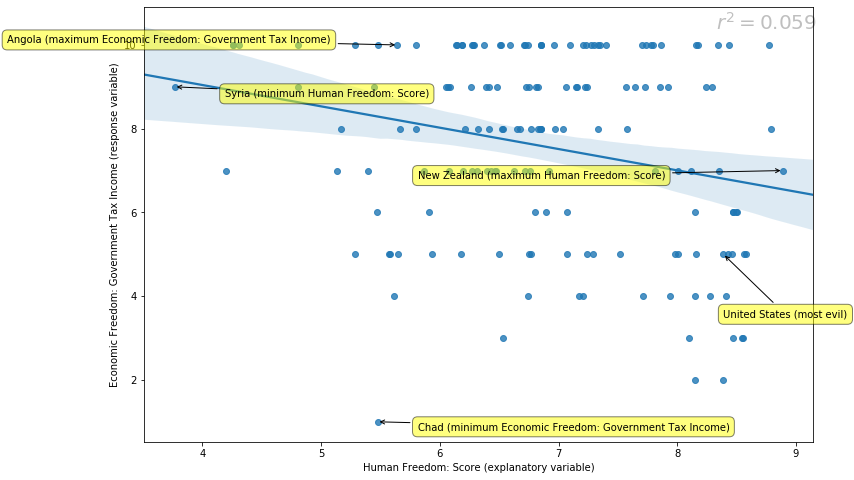

In [86]:

rv_min_xytext = (40, -10)
rv_max_xytext = (-390, 0)
ev_min_xytext = (50, -12)
ev_max_xytext = (-365, -10)
us_xytext = (0, -65)
i = 2
columns_list = [column_pairs_list[i][0].split('/')[0], column_pairs_list[i][0].split('/')[1]]
columns_list = ['hf_score', 'ef_government_tax_income']
show_linear_scatterplot(merge_df, columns_list, ev_min_str=None, ev_max_str=None, rv_min_str=None, rv_max_str=None)

Pickling to C:\Users\dev\Documents\repositories\notebooks\StatsByCountry\saves\pickle\column_description_dict.pickle


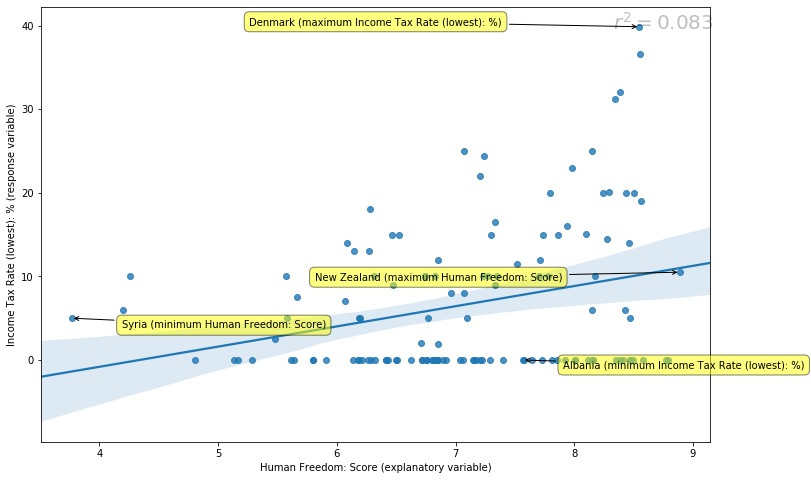

In [85]:

rv_min_xytext = (40, -10)
rv_max_xytext = (-390, 0)
ev_min_xytext = (50, -12)
ev_max_xytext = (-365, -10)
us_xytext = (0, -65)
i = 2
columns_list = [column_pairs_list[i][0].split('/')[0], column_pairs_list[i][0].split('/')[1]]
columns_list = ['hf_score', 'Income_lowest']
show_linear_scatterplot(merge_df, columns_list, ev_min_str=None, ev_max_str=None, rv_min_str=None, rv_max_str=None)

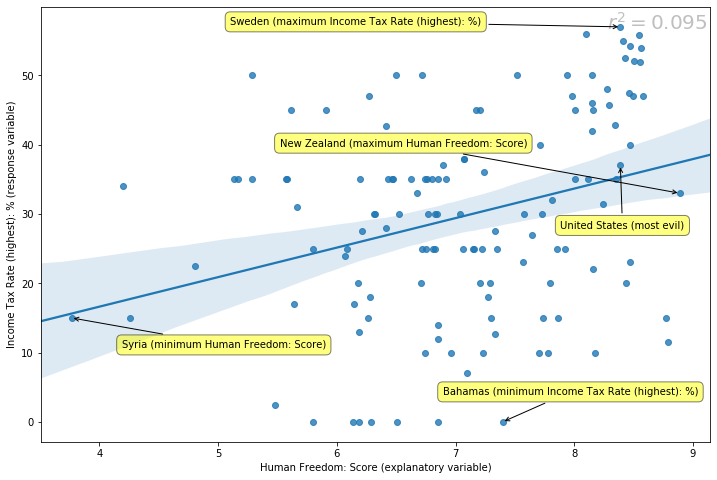

In [98]:

rv_min_xytext = (-60, 25)
rv_max_xytext = (-390, 0)
ev_min_xytext = (50, -32)
ev_max_xytext = (-400, 45)
us_xytext = (-60, -65)
i = 2
columns_list = [column_pairs_list[i][0].split('/')[0], column_pairs_list[i][0].split('/')[1]]
columns_list = ['hf_score', 'Income_highest']
show_linear_scatterplot(merge_df, columns_list, ev_min_str=None, ev_max_str=None, rv_min_str=None, rv_max_str=None)

Pickling to C:\Users\dev\Documents\repositories\notebooks\StatsByCountry\saves\pickle\column_description_dict.pickle


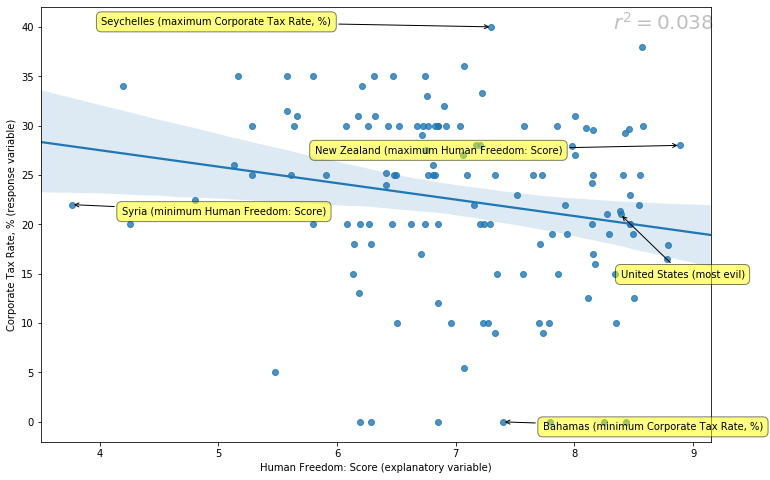

In [81]:

rv_min_xytext = (40, -10)
rv_max_xytext = (-390, 0)
ev_min_xytext = (50, -12)
ev_max_xytext = (-365, -10)
us_xytext = (0, -65)
i = 2
columns_list = [column_pairs_list[i][0].split('/')[0], column_pairs_list[i][0].split('/')[1]]
columns_list = ['hf_score', 'Corporate']
show_linear_scatterplot(merge_df, columns_list, ev_min_str=None, ev_max_str=None, rv_min_str=None, rv_max_str=None)

In [101]:

tables_url = 'http://proximityone.com/diversity2015.htm'
tables_df_list = pd.read_html(tables_url)
print([(i, df.shape) for (i, df) in enumerate(tables_df_list)])

[(0, (1, 3)), (1, (2, 1)), (2, (2, 1)), (3, (11, 3)), (4, (1, 1))]


In [109]:

!start %windir%\explorer.exe "{os.path.abspath(DATA_CSV_FOLDER)}"

In [123]:

# https://www.kff.org/other/state-indicator/distribution-by-raceethnicity/
csv_path = os.path.join(DATA_CSV_FOLDER, 'Population_Distribution_by_Race.csv')
state_race_df = pd.read_csv(csv_path, encoding=ENCODING_TYPE, low_memory=False)
print(state_race_df.shape, state_race_df.columns.tolist())
state_race_df.columns = ['State', 'White', 'Black', 'Hispanic', 'Asian', 'Native', 'Islander', 'Multi']
state_race_df.set_index('State', inplace=True)
print(len(state_race_df.index.unique()))
state_race_df = state_race_df.fillna(0)
state_race_df.sample(5).T.sample(7).T

(53, 8) ['Location', 'White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native', 'Native Hawaiian/Other Pacific Islander', 'Two Or More Races']
53


,Asian,Black,Multi,Islander,Native,White,Hispanic
State,,,,,,,
South Dakota,0.01,0.02,0.02,0.0,0.08,0.83,0.04
Mississippi,0.01,0.38,0.01,0.0,0.00,0.57,0.03
Alabama,0.01,0.27,0.02,0.0,0.00,0.66,0.04
District of Columbia,0.04,0.46,0.03,0.0,0.00,0.36,0.11
Massachusetts,0.06,0.07,0.03,0.0,0.00,0.72,0.12


In [104]:

def gini(x):
    # (Warning: This is a concise implementation, but it is O(n**2)
    # in time and memory, where n = len(x).  *Don't* pass in huge
    # samples!)

    # Mean absolute difference
    mad = pd.np.abs(pd.np.subtract.outer(x, x)).mean()
    
    # Relative mean absolute difference
    rmad = mad/pd.np.mean(x)
    
    # Gini coefficient
    g = 0.5 * rmad
    
    return g

In [106]:

gini([0, 0, 0, 0, 0])

C:\Users\dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


nan

In [107]:

gini([1, 1, 1, 1, 1])

0.0

In [108]:

gini([5, 0, 0, 0, 0])

0.8

In [124]:

print(state_race_df.loc[match_series].values)
gini(state_race_df.loc[match_series].values)

[[0.01 0.   0.99 0.   0.   0.   0.  ]]


0.8542857142857144

In [127]:

state_race_df['gini_index'] = pd.np.nan
race_columns_list = ['White', 'Black', 'Hispanic', 'Asian', 'Native', 'Islander', 'Multi']
for idx in state_race_df.index:
    match_series = (state_race_df.index == idx)
    print('{}: {:.02}, {:.02}'.format(idx, state_race_df.loc[match_series][race_columns_list].sum().sum(),
                                      gini(state_race_df.loc[match_series][race_columns_list].values)))
    state_race_df.loc[match_series, 'gini_index'] = gini(state_race_df.loc[match_series][race_columns_list].values)

United States: 1.0, 0.64
Alabama: 1.0, 0.73
Alaska: 1.0, 0.57
Arizona: 1.0, 0.63
Arkansas: 1.0, 0.71
California: 0.98, 0.59
Colorado: 1.0, 0.7
Connecticut: 1.0, 0.68
Delaware: 1.0, 0.68
District of Columbia: 1.0, 0.62
Florida: 1.0, 0.65
Georgia: 1.0, 0.65
Hawaii: 1.0, 0.47
Idaho: 1.0, 0.77
Illinois: 0.99, 0.66
Indiana: 0.99, 0.75
Iowa: 1.0, 0.77
Kansas: 1.0, 0.72
Kentucky: 0.99, 0.79
Louisiana: 1.0, 0.68
Maine: 1.0, 0.81
Maryland: 1.0, 0.62
Massachusetts: 1.0, 0.7
Michigan: 1.0, 0.73
Minnesota: 1.0, 0.72
Mississippi: 1.0, 0.71
Missouri: 1.0, 0.75
Montana: 1.0, 0.78
Nebraska: 1.0, 0.74
Nevada: 1.0, 0.58
New Hampshire: 1.0, 0.8
New Jersey: 1.0, 0.62
New Mexico: 1.0, 0.65
New York: 1.0, 0.61
North Carolina: 1.0, 0.67
North Dakota: 1.0, 0.75
Ohio: 1.0, 0.75
Oklahoma: 1.0, 0.62
Oregon: 1.0, 0.72
Pennsylvania: 1.0, 0.74
Rhode Island: 1.0, 0.71
South Carolina: 1.0, 0.71
South Dakota: 1.0, 0.76
Tennessee: 0.99, 0.74
Texas: 1.0, 0.61
Utah: 1.0, 0.75
Vermont: 1.0, 0.81
Virginia: 1.0, 0.66
Washin

In [129]:

state_race_df.sort_values('White')

,White,Black,Hispanic,Asian,Native,Islander,Multi,gini_index
State,,,,,,,,
Puerto Rico,0.01,0.00,0.99,0.00,0.00,0.00,0.00,0.854286
Hawaii,0.21,0.01,0.10,0.38,0.00,0.10,0.20,0.468571
District of Columbia,0.36,0.46,0.11,0.04,0.00,0.00,0.03,0.622857
New Mexico,0.37,0.02,0.49,0.01,0.09,0.00,0.02,0.645714
California,0.37,0.05,0.39,0.14,0.00,0.00,0.03,0.588921
Texas,0.42,0.12,0.40,0.05,0.00,0.00,0.02,0.611033
Nevada,0.49,0.09,0.29,0.08,0.01,0.01,0.04,0.579915
Maryland,0.51,0.29,0.10,0.07,0.00,0.00,0.03,0.622857
Georgia,0.53,0.31,0.10,0.04,0.00,0.00,0.02,0.654286


In [128]:

state_race_df.sort_values('gini_index')

,White,Black,Hispanic,Asian,Native,Islander,Multi,gini_index
State,,,,,,,,
Hawaii,0.21,0.01,0.10,0.38,0.00,0.10,0.20,0.468571
Alaska,0.61,0.03,0.07,0.07,0.13,0.01,0.09,0.571429
Nevada,0.49,0.09,0.29,0.08,0.01,0.01,0.04,0.579915
California,0.37,0.05,0.39,0.14,0.00,0.00,0.03,0.588921
Texas,0.42,0.12,0.40,0.05,0.00,0.00,0.02,0.611033
New York,0.55,0.14,0.19,0.09,0.00,0.00,0.03,0.611429
New Jersey,0.55,0.13,0.21,0.10,0.00,0.00,0.02,0.616690
Oklahoma,0.66,0.07,0.11,0.02,0.07,0.00,0.07,0.617143
Maryland,0.51,0.29,0.10,0.07,0.00,0.00,0.03,0.622857


In [140]:

def f(state_str):
    idx = int(len(state_str)/2)
    
    return state_str[idx:]

In [142]:

# https://www.usnews.com/news/best-states/rankings
html_folder = os.path.join(DATA_FOLDER, 'html')
file_path = os.path.join(html_folder, 'us_news_and_world_report_state_stats.html')
state_effectiveness_df = pd.read_html(file_path)[0].dropna(how='all', axis=1).dropna(how='all', axis=0)
state_effectiveness_df['State'] = state_effectiveness_df['State'].map(f)
state_effectiveness_df.set_index('State', inplace=True)
state_effectiveness_df

,Rank,Health Care,Education,Economy,Infrastructure,Opportunity,Fiscal Stability,Crime & Corrections,Natural Environment
State,,,,,,,,,
Washington,1.0,4.0,4.0,3.0,2.0,19.0,22.0,15.0,14.0
New Hampshire,2.0,16.0,5.0,13.0,31.0,1.0,10.0,1.0,4.0
Minnesota,3.0,10.0,17.0,18.0,6.0,3.0,25.0,16.0,3.0
Utah,4.0,9.0,10.0,2.0,3.0,24.0,5.0,12.0,49.0
Vermont,5.0,11.0,8.0,29.0,28.0,10.0,19.0,2.0,7.0
Maryland,6.0,8.0,13.0,26.0,21.0,5.0,15.0,22.0,25.0
Virginia,7.0,18.0,7.0,25.0,35.0,9.0,8.0,9.0,18.0
Massachusetts,8.0,2.0,1.0,7.0,44.0,29.0,30.0,4.0,26.0
Nebraska,9.0,27.0,6.0,21.0,9.0,15.0,7.0,24.0,27.0


In [143]:

print(state_race_df.shape, state_effectiveness_df.shape)
us_stats_df = pd.merge(left=state_race_df, right=state_effectiveness_df, left_index=True, right_index=True, suffixes=('_gini', '_effectiveness'))
print(us_stats_df.shape)
us_stats_df.columns.tolist()

(53, 8) (50, 9)
(50, 17)


['White', 'Black', 'Hispanic', 'Asian', 'Native', 'Islander', 'Multi', 'gini_index', 'Rank', 'Health Care', 'Education', 'Economy', 'Infrastructure', 'Opportunity', 'Fiscal Stability', 'Crime & Corrections', 'Natural Environment']

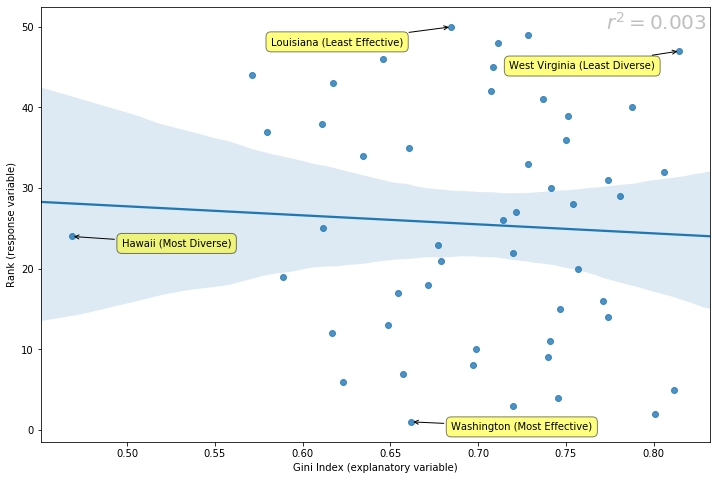

In [152]:

rv_min_xytext = (40, -10)
rv_max_xytext = (-180, -20)
ev_min_xytext = (50, -12)
ev_max_xytext = (-170, -20)
columns_list = ['gini_index', 'Rank']
show_linear_scatterplot(us_stats_df, columns_list, ev_min_str='Most Diverse', ev_max_str='Least Diverse',
                        rv_min_str='Most Effective', rv_max_str='Least Effective')

In [154]:

%who

DATA_CSV_FOLDER	 DATA_FOLDER	 ENCODING_TYPE	 SAVES_CSV_FOLDER	 SAVES_FOLDER	 SAVES_PICKLE_FOLDER	 SequenceMatcher	 attempt_to_pickle	 basecolor_list	 
c_tuple	 check_4_doubles	 check_for_typos	 column_description_dict	 column_descriptions_df	 column_name	 column_pairs_list	 columns_list	 csv	 
csv_path	 df	 encoding	 ev_max_xytext	 ev_min_xytext	 example_iterrows	 f	 file_path	 freedom_df	 
gdp_df	 get_column_description	 get_column_descriptions	 gini	 html_folder	 i	 idx	 kwargs	 load_csv	 
load_dataframes	 load_object	 match_series	 math	 mcolors	 merge_df	 numeric_columns_list	 os	 pd	 
pickle	 plt	 r_columns_list	 r_tuple	 race_columns_list	 re	 rv_max_xytext	 rv_min_xytext	 save_dataframes	 
show_linear_scatterplot	 similar	 sns	 state_effectiveness_df	 us_stats_df	 state_race_df	 state_str	 stats	 store_objects	 
sys	 tables_df_list	 tables_url	 taxes_df	 time	 typos_df	 us_xytext	 x	 x_column	 
y	 y_column	 


In [156]:

store_objects(column_descriptions_df=column_descriptions_df, freedom_df=freedom_df, gdp_df=gdp_df, merge_df=merge_df,
              state_effectiveness_df=state_effectiveness_df, us_stats_df=us_stats_df, state_race_df=state_race_df, taxes_df=taxes_df,
              typos_df=typos_df)

Pickling to C:\Users\dev\Documents\repositories\notebooks\StatsByCountry\saves\pickle\column_descriptions_df.pickle
Pickling to C:\Users\dev\Documents\repositories\notebooks\StatsByCountry\saves\pickle\freedom_df.pickle
Pickling to C:\Users\dev\Documents\repositories\notebooks\StatsByCountry\saves\pickle\gdp_df.pickle
Pickling to C:\Users\dev\Documents\repositories\notebooks\StatsByCountry\saves\pickle\merge_df.pickle
Pickling to C:\Users\dev\Documents\repositories\notebooks\StatsByCountry\saves\pickle\state_effectiveness_df.pickle
Pickling to C:\Users\dev\Documents\repositories\notebooks\StatsByCountry\saves\pickle\us_stats_df.pickle
Pickling to C:\Users\dev\Documents\repositories\notebooks\StatsByCountry\saves\pickle\state_race_df.pickle
Pickling to C:\Users\dev\Documents\repositories\notebooks\StatsByCountry\saves\pickle\taxes_df.pickle
Pickling to C:\Users\dev\Documents\repositories\notebooks\StatsByCountry\saves\pickle\typos_df.pickle


In [5]:

[fn for fn in dir(os.path) if 'dir' in fn.lower()]

['curdir', 'dirname', 'isdir', 'pardir']

In [6]:

[fn for fn in dir(os) if 'dir' in fn.lower()]

['DirEntry', 'chdir', 'curdir', 'listdir', 'makedirs', 'mkdir', 'pardir', 'removedirs', 'rmdir', 'scandir', 'supports_dir_fd']

In [24]:

for file_name in os.listdir(SAVES_PICKLE_FOLDER):
    df = load_object(file_name.split('.')[0])
    if isinstance(df, pd.DataFrame):
        if df.shape[0] > 60:
            print()
            print(file_name, df.shape, df.columns.tolist())


capitalism_gini_df.pickle (168, 12) ['Rank', 'Country', 'Overall Capitalism', 'Change', 'UN R/P 10%', 'UN R/P 20%', 'World Bank Gini %', 'World Bank Gini Year', 'CIA R/P 10%', 'CIA R/P Year', 'CIA Gini %', 'CIA Gini Year']

column_descriptions_df.pickle (127, 9) ['column_name', 'dtype', 'count_blanks', 'count_uniques', 'count_zeroes', 'has_dates', 'min_value', 'max_value', 'only_integers']

freedom_df.pickle (1458, 122) ['Year', 'ISO_code', 'Region', 'hf_score', 'hf_rank', 'hf_quartile', 'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide', 'pf_ss_disappearances_disap', 'pf_ss_disappearances_violent', 'pf_ss_disappearances_organized', 'pf_ss_disappearances_fatalities', 'pf_ss_disappearances_injuries', 'pf_ss_disappearances', 'pf_ss_women_fgm', 'pf_ss_women_missing', 'pf_ss_women_inheritance_widows', 'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', 'pf_ss_women', 'pf_ss', 'pf_movement_domestic', 'pf_movement_foreign', 'pf_movement_women', 'p

In [9]:

dir(pd)

['Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Float64Index', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype', 'Int64Index', 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NaT', 'Panel', 'Period', 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseArray', 'SparseDataFrame', 'SparseDtype', 'SparseSeries', 'TimeGrouper', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt64Index', 'UInt8Dtype', '__builtins__', '__cached__', '__doc__', '__docformat__', '__file__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_hashtable', '_lib', '_libs', '_np_version_under1p13', '_np_version_under1p14', '_np_version_under1p15', '_np_version_under1p16', '_np_version_under1p17', '_tslib', '_version', 'api', 'array', 'arrays', 'bdate_rang